<a href="https://colab.research.google.com/github/goeludit/Data-Science/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Forest
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris /iris-dataset.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.describe()
iris.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


(75, 4)
(75,)
(75, 4)
(75,)


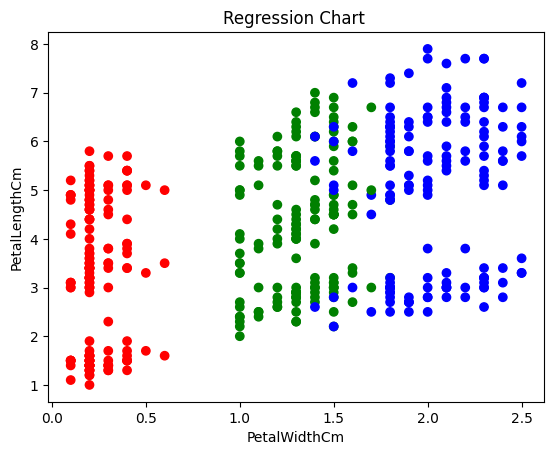

In [7]:
from os import pread
array = np.array(iris['Species'])
np.set_printoptions(2,None)


color = {'Iris-setosa':'red','Iris-versicolor':'green','Iris-virginica':'blue'}
l = {'Setosa':'Setosa','Versicolor':'Versicolor','Virginica':'Virginica'}


def plt_scatter (iris,cols,col_x = 'PetalWidthCm'):
 for col in cols:
   # print(col.shape)
    #print(iris[)
    plt.scatter(data = iris, x = col_x, y = col, c = iris['Species'].apply(lambda x : color[x]))
    plt.xlabel(col_x)
    plt.ylabel(col)
    plt.title("Regression Chart ")



iris_features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"]
plt_scatter(iris,iris_features)



num_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
iris_scaled = scale(iris[num_cols])

#Uncomment here


iris_scaled = iris[num_cols]
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)


iris_scaled['Species'] = iris['Species']


levels = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris['Species']]

from sklearn.model_selection import train_test_split


np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size = 75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4])
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

#iris_train_labels = np.reshape((iris_train_labels), (1,-1))
#iris_train_features = np.reshape((iris_train_features), (1,-1))

iris_train_features = np.asarray(iris_train_features)
iris_test_features = np.asarray(iris_test_features)



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


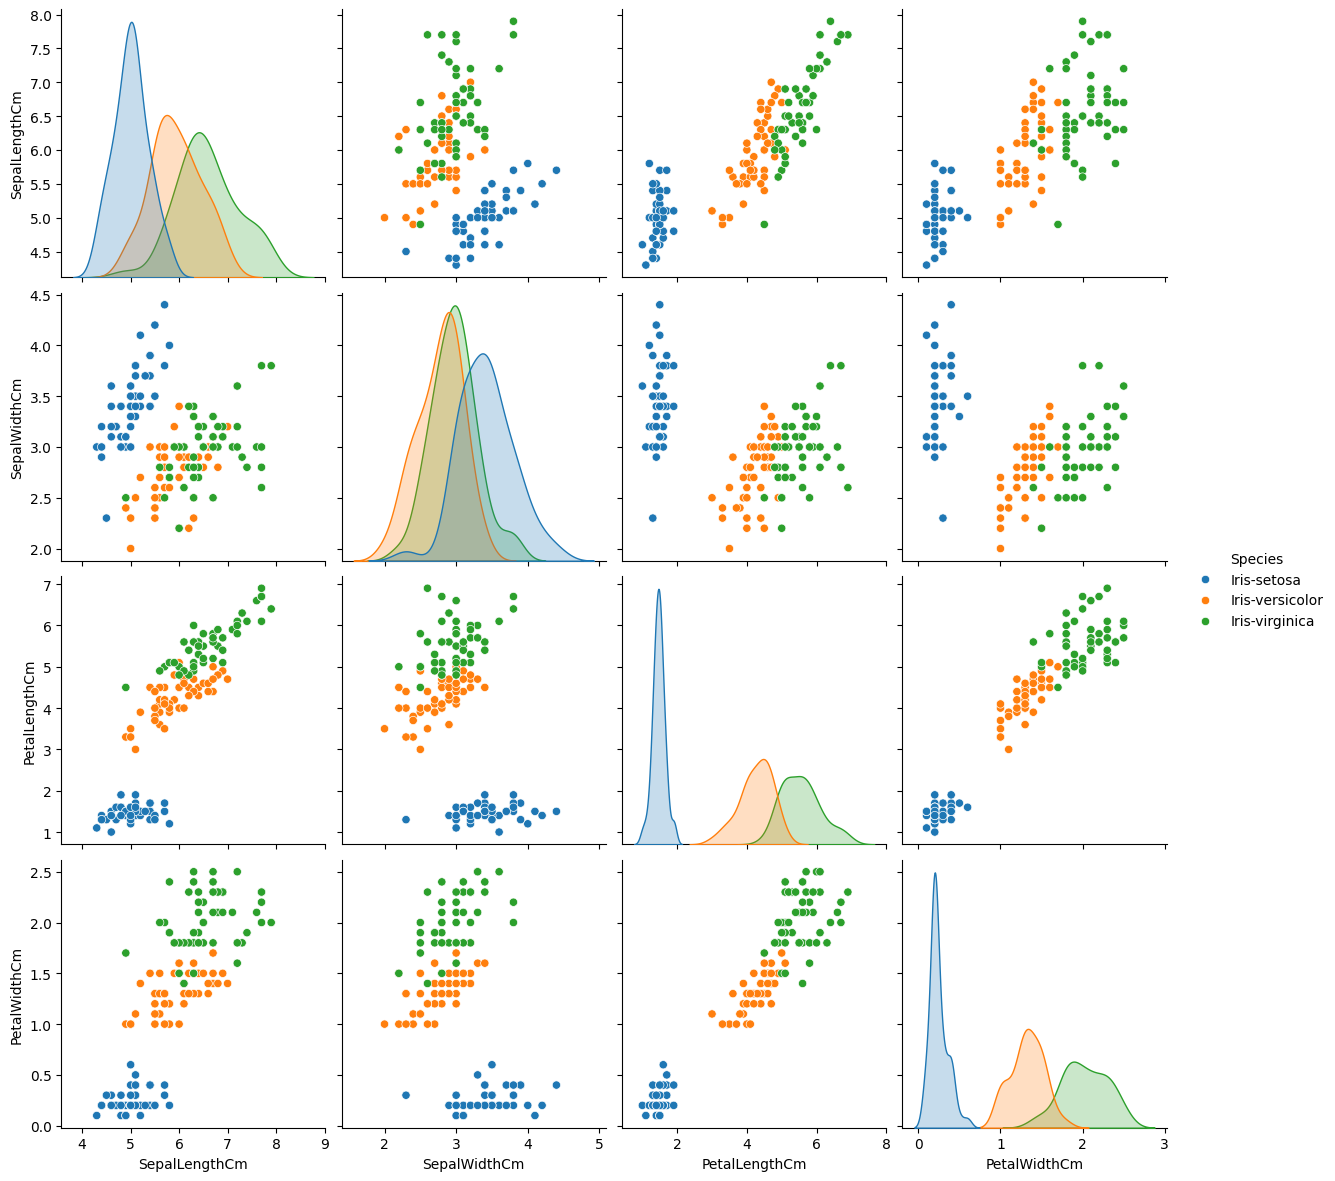

In [14]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")


In [20]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

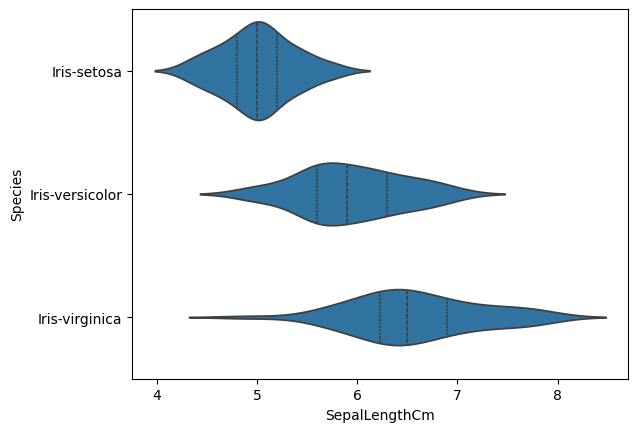

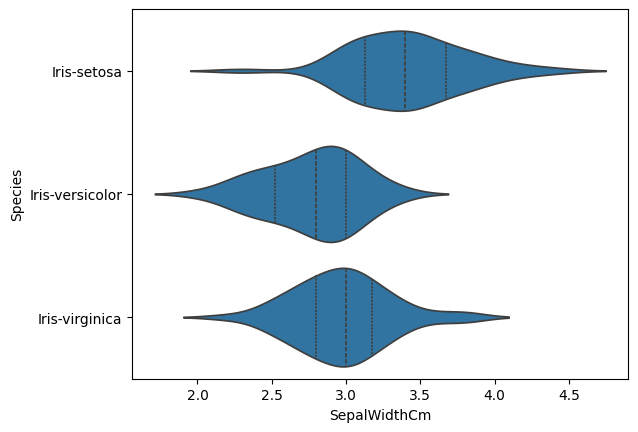

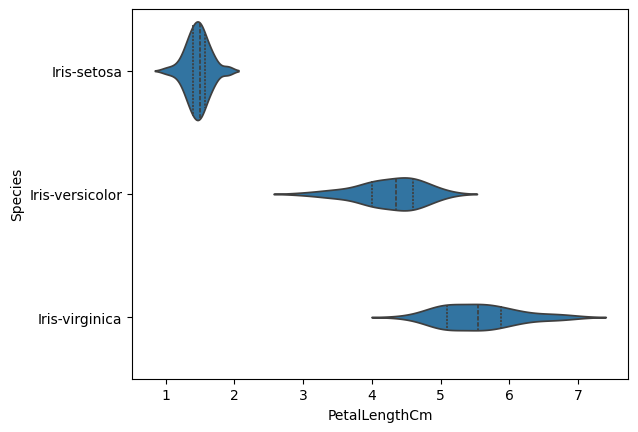

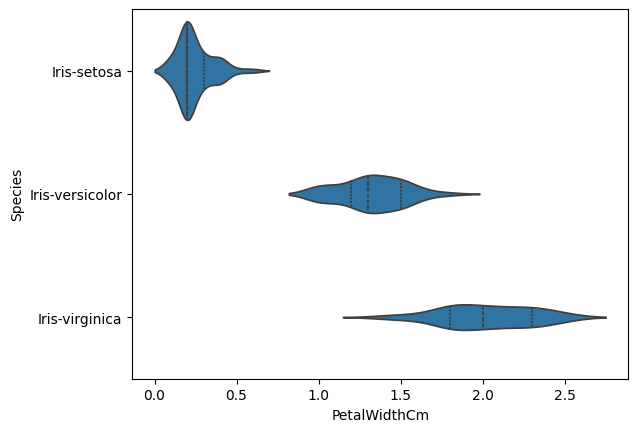

In [16]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

In [17]:
#Using Random Forest
RF = RandomForestClassifier()
RF.fit(iris_train_features,iris_train_labels)


rf_predict = RF.predict(iris_test_features)


print("Accuracy:",metrics.accuracy_score(iris_test_labels,rf_predict))






Accuracy: 0.9066666666666666


In [18]:
#Using KNeighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(iris_train_features, iris_train_labels)
Y_pred = knn.predict(iris_test_features)
print("Accuracy:",metrics.accuracy_score(iris_test_labels, Y_pred))


Accuracy: 0.9066666666666666


In [19]:
#Using Naivye Bayes

NB1 = GaussianNB()
NB1.fit(iris_train_features,iris_train_labels)


nb_predict = NB1.predict(iris_test_features)

print("Accuracy:",metrics.accuracy_score(iris_test_labels,nb_predict))

Accuracy: 0.96
